# Final Project Team 4 – Student Performance Dataset



In [11]:
#libraries 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Cleaning
- Handle missing values
- Encode categorical variables
- Drop irrelevant columns

In [12]:
# Folder convention: keep raw files under ./data/raw
DATA_DIR = Path("data")
RAW_DIR = DATA_DIR / "raw"
RAW_DIR.mkdir(parents=True, exist_ok=True)

# 1) Load raw CSVs (UCI files use semicolon separator)
mat = pd.read_csv(RAW_DIR / "student-mat.csv", sep=";")
por = pd.read_csv(RAW_DIR / "student-por.csv", sep=";")

# Optional: tag course to know origin
mat["course"] = "math"
por["course"] = "portuguese"

# 2) Save untouched copies (good practice)
mat.to_csv(DATA_DIR / "rawdata_student_mat.csv", index=False)
por.to_csv(DATA_DIR / "rawdata_student_por.csv", index=False)

# 3) Merge (stack) the two datasets
merged = pd.concat([mat, por], axis=0, ignore_index=True)

# 4) Basic type fixes
grade_cols = ["G1", "G2", "G3"]
for c in grade_cols:
    merged[c] = pd.to_numeric(merged[c], errors="coerce")

# 5) Handle missing values (simple policy: drop rows with NA in target or key predictors)
merged = merged.dropna(subset=["G3"])

# 6) Remove exact duplicate rows
merged = merged.drop_duplicates()

# 7) (Optional) Normalize yes/no & binary categories to 0/1 for modeling
yn_cols = ["schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
for c in yn_cols:
    if c in merged.columns:
        merged[c] = merged[c].map({"yes":1, "no":0})

# 8) Save cleaned dataset for EDA & modeling
CLEAN_PATH = DATA_DIR / "student_clean.csv"
merged.to_csv(CLEAN_PATH, index=False)

print(f"Cleaned dataset saved to: {CLEAN_PATH.resolve()}")
print(merged.shape)
merged.head()


Cleaned dataset saved to: /Users/gisselletosta/Final-Project-Team-4-AAI500/data/student_clean.csv
(1044, 34)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


## 2. Exploratory Data Analysis (EDA)
- Summary statistics
- Visualizations (histograms, boxplots, scatterplots, heatmaps)

Shape of dataset: (1044, 34)

Summary statistics:



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portuguese
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,649
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,...,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,NaN
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,...,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,NaN



Missing values per column:

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64


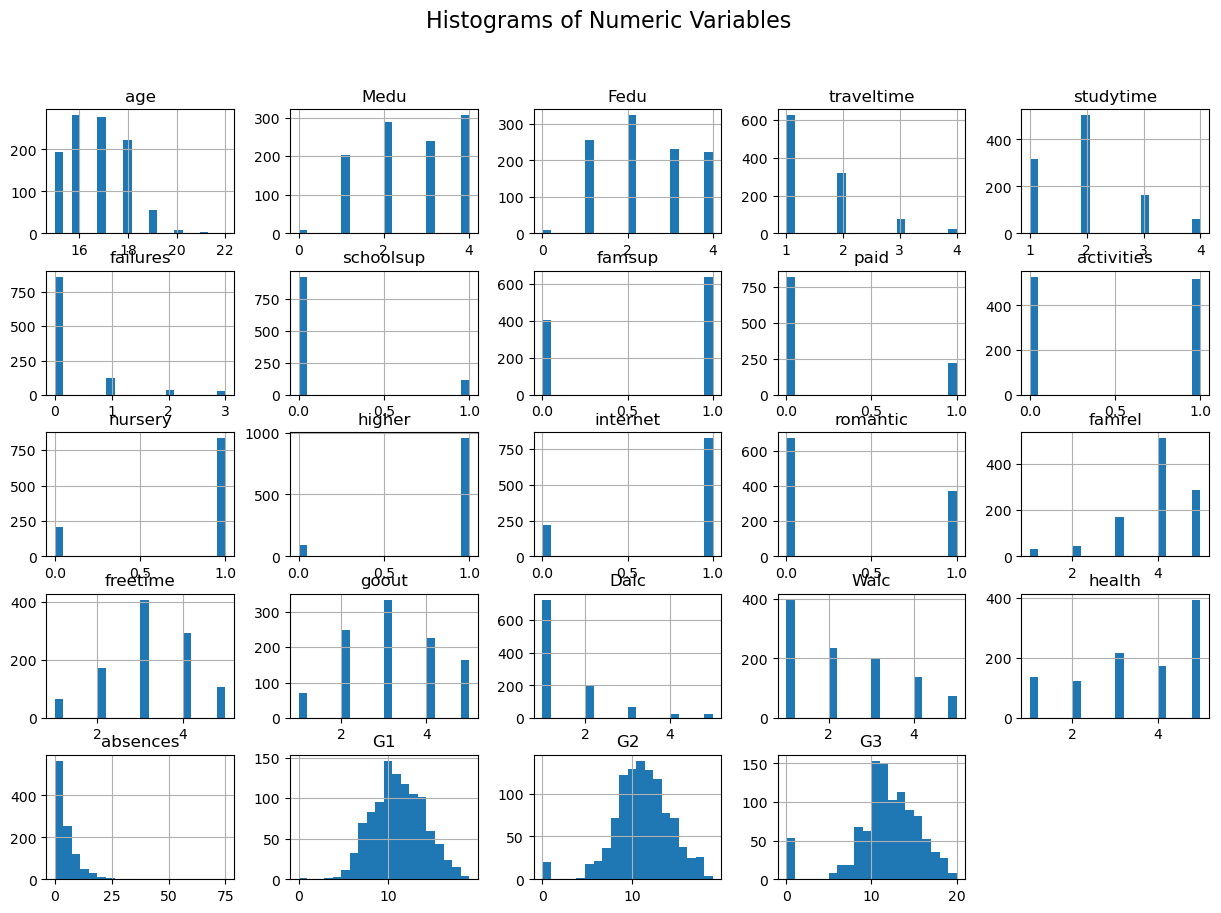

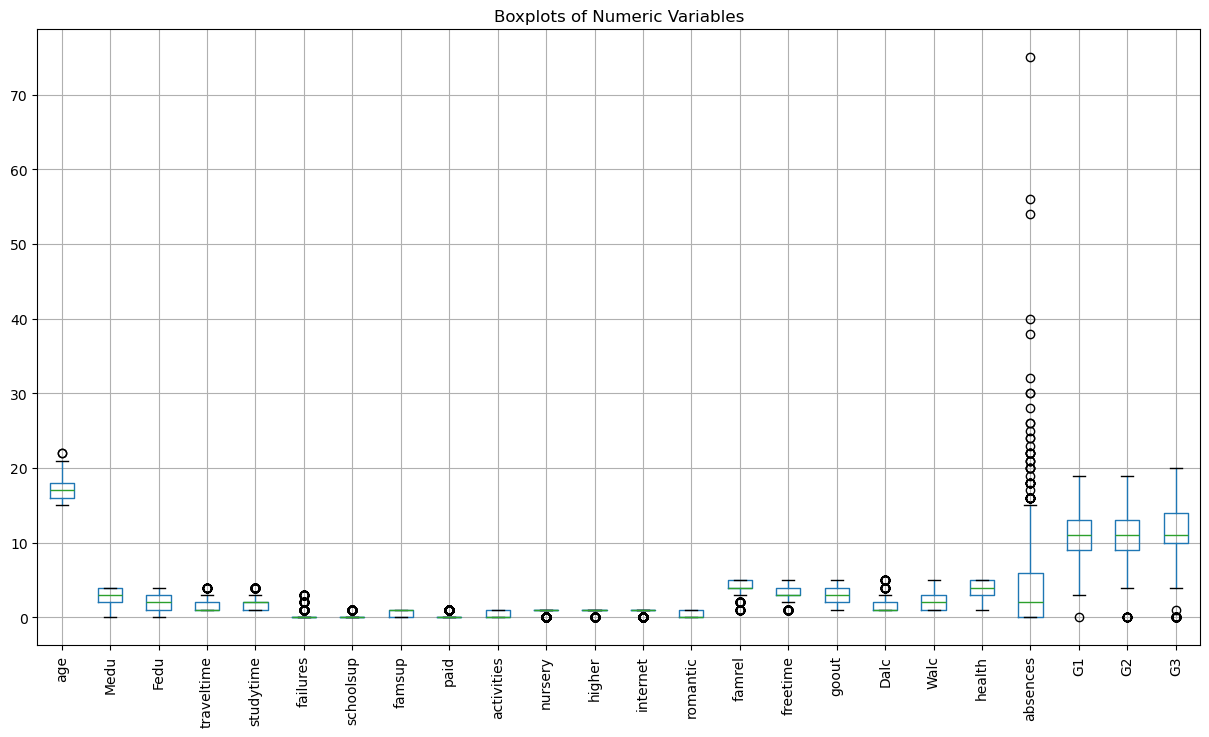

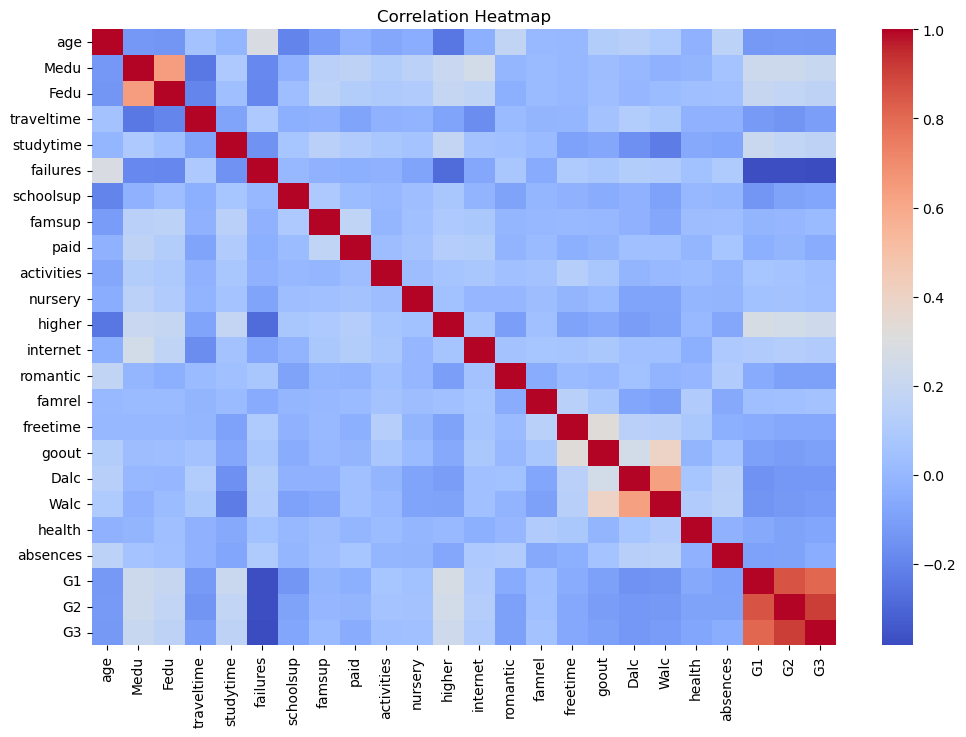

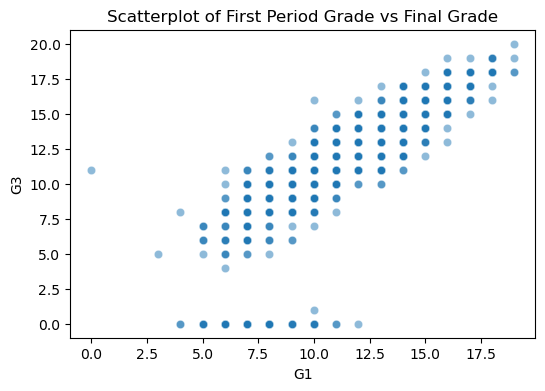

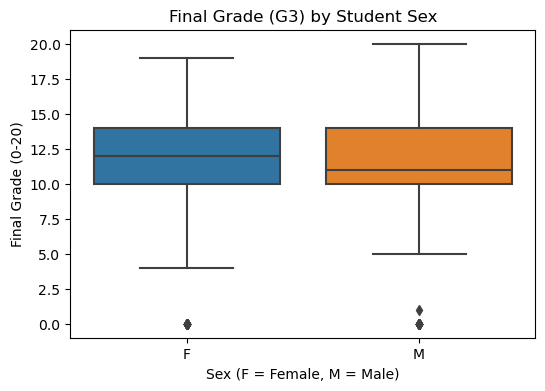

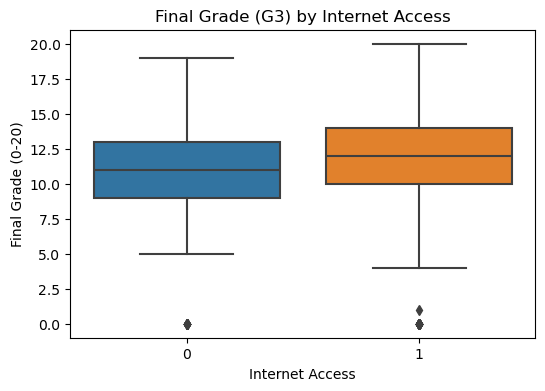


Value counts for school:
school
GP    0.739464
MS    0.260536
Name: proportion, dtype: float64

Value counts for sex:
sex
F    0.566092
M    0.433908
Name: proportion, dtype: float64

Value counts for address:
address
U    0.727011
R    0.272989
Name: proportion, dtype: float64

Value counts for famsize:
famsize
GT3    0.706897
LE3    0.293103
Name: proportion, dtype: float64

Value counts for Pstatus:
Pstatus
T    0.8841
A    0.1159
Name: proportion, dtype: float64

Value counts for Mjob:
Mjob
other       0.382184
services    0.228927
at_home     0.185824
teacher     0.124521
health      0.078544
Name: proportion, dtype: float64

Value counts for Fjob:
Fjob
other       0.559387
services    0.279693
teacher     0.062261
at_home     0.059387
health      0.039272
Name: proportion, dtype: float64

Value counts for reason:
reason
course        0.411877
home          0.247126
reputation    0.237548
other         0.103448
Name: proportion, dtype: float64

Value counts for guardian:
guardian

In [14]:
# THESE ARE A GENERAL EDA RUN GIVEN WE HAVE NOT YET CHOSEN A RESEARCH QUESTION. 
# MUST EDIT BASED ON OUR RESEARCH QUESTION OR USE AS A GUIDE - NOT THE ACTUAL FINAL WORK.

# Load the cleaned dataset
df = pd.read_csv("data/student_clean.csv")

# --- 1. Descriptive statistics ---
print("Shape of dataset:", df.shape)
print("\nSummary statistics:\n")
display(df.describe(include="all"))  # covers numeric + categorical

# Check missing values again
print("\nMissing values per column:\n")
print(df.isnull().sum())

# --- 2. Histograms for numeric variables ---
# Only select numeric columns for histograms
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

# --- 3. Boxplots (to check for outliers in numeric variables) ---
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Variables")
plt.show()

# --- 4. Correlation heatmap (only for numeric variables) ---
plt.figure(figsize=(12, 8))
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --- 5. Example scatterplot (G1 vs G3 grades) ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x="G1", y="G3", data=df, alpha=0.5)
plt.title("Scatterplot of First Period Grade vs Final Grade")
plt.show()

# --- 6. Boxplot of Final Grade (G3) by Sex
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="G3", data=df)
plt.title("Final Grade (G3) by Student Sex")
plt.xlabel("Sex (F = Female, M = Male)")
plt.ylabel("Final Grade (0-20)")
plt.show()

# Boxplot of Final Grade (G3) by Internet Access
plt.figure(figsize=(6,4))
sns.boxplot(x="internet", y="G3", data=df)
plt.title("Final Grade (G3) by Internet Access")
plt.xlabel("Internet Access")
plt.ylabel("Final Grade (0-20)")
plt.show()

# --- 7. Basic summaries for categorical variables ---
for col in df.select_dtypes(include=["object"]).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True).head())

## 3. Models
- Baseline model
- Candidate models (logistic regression, random forest, SVM, etc.)
- Hyperparameter tuning

## 4. Results & Analysis
- Model performance metrics
- Comparisons
- Interpretation

## 5. Conclusion & Next Steps
- Key takeaways
- Limitations
- Recommendations